# Exercise 2 : Logistic Regression

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [88]:
data = pd.read_csv("ex2data1.txt", header=None, names=["exam1", "exam2", "admResult"])

## Visualization of Data

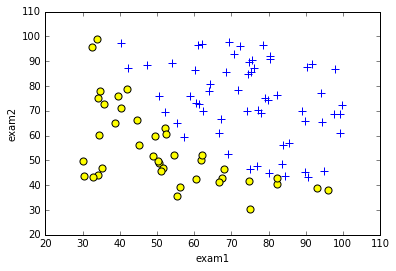

In [27]:
pos = data[data["admResult"]==1]
neg = data[data["admResult"]==0]
plt.scatter(pos["exam1"], pos["exam2"], marker='+', s=50)
plt.scatter(neg["exam1"], neg["exam2"], c='yellow', marker='o', s=50)
plt.xlabel("exam1")
plt.ylabel("exam2")
plt.show()

## Sigmoid function

In [44]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

## Cost Function

In [536]:
X = np.array( data.iloc[:, 0:2] )
y = np.array(data.iloc[:, 2])
X = np.append(np.ones((len(X),1)), X, 1)
m, n = X.shape

In [574]:
def costFunction(X, y, theta):
    m = len(y)
    J = (-y.transpose().dot( np.log( sigmoid(X.dot(theta)) ) ) - (1-y).transpose().dot(np.log( 1- sigmoid(X.dot(theta)) ) ) ) / m
    grad = ((sigmoid(X.dot(theta)) - y).transpose().dot(X) )/ m
    return [J, grad]

In [575]:
theta = np.zeros(n)
costFunction(X, y, theta)

[0.69314718055994529, array([ -0.1       , -12.00921659, -11.26284221])]

## Optimization with Scipy function

In [353]:
def computeGrad(theta):
    global X
    global y
    J, grad = costFunction(X, y, theta)
    return grad

In [359]:
def computeCost(theta):
    global X
    global y
    J, grad = costFunction(X, y, theta)
    #print('theta: ', theta, end=' ')
    #print('J: ', J, end=' ')
    #print('grad: ', grad)
    return J

In [576]:
initialTheta = np.zeros(3)
# Getting warning with BFGS 
#result = scipy.optimize.minimize(computeCost, x0=initialTheta, method='BFGS', jac=computeGrad,options={'gtol': 1e-7, 'disp': True})
result = scipy.optimize.minimize(computeCost, x0=initialTheta, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [577]:
thetaOpt = result['x']

In [578]:
thetaOpt

array([-25.16130062,   0.20623142,   0.20147143])

## Visualization

In [579]:
def plotBoundary(X, y, theta):
    pos = X[np.where(y==1)]
    neg = X[np.where(y==0)]
    plt.scatter(pos[:,1], pos[:,2], marker='x')
    plt.scatter(neg[:,1], neg[:,2], c='yellow', marker='o')
    xPlot = np.array([min(X[:,1]), max(X[:,1])])
    yPlot = -(theta[0] + xPlot*theta[1])/ theta[2]
    plt.plot(xPlot, yPlot, c='red')
    plt.xlabel('exam1')
    plt.ylabel('exam2')
    plt.show()

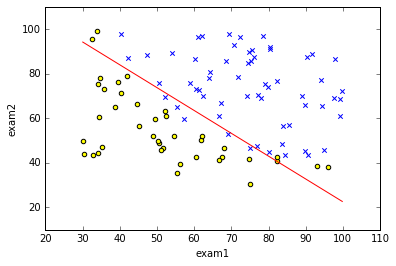

In [580]:
thetaOpt = result['x']
plotBoundary(X, y, thetaOpt)

## Explore a little bit more with Regularization

In [555]:
regX = np.append(X, X[:,1:2]**2, 1)

In [597]:
def costRegFunction(X, y, theta, lamd):
    m = len(y)
    J = (-y.transpose().dot(np.log(sigmoid(X.dot(theta))+0.1 )) - (1-y).transpose().dot(np.log(1-sigmoid(X.dot(theta))+0.1)))/m + lamd*sum(theta[1:]**2) / (2*m)
    grad = (sigmoid(X.dot(theta)) - y).transpose().dot(X).transpose() /m + np.append(0, theta[1:]/m) * lamd
    return [J, grad]

In [598]:
def computeRegCost(theta):
    global lamd
    global regX
    global y
    J, grad = costRegFunction(regX, y, theta, lamd)
    return J

In [599]:
def computeRegGrad(theta):
    global lamd
    global regX
    global y
    J, grad = costRegFunction(regX, y, theta, lamd)
    return grad

### Optimization : Get theta

In [600]:
lamd = 0.1
initialTheta = np.zeros(regX.shape[1])
#resultReg = scipy.optimize.minimize(computeRegCost, x0=initialTheta, method='BFGS', jac=computeRegGrad,options={'gtol': 1e-7, 'disp': True})
resultReg = scipy.optimize.minimize(computeRegCost, x0=initialTheta, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: -0.057486
         Iterations: 463
         Function evaluations: 787


In [601]:
thetaOptReg = resultReg['x']
thetaOptReg

array([ -2.36942409e+02,   4.36962815e+00,   1.17734894e+00,
        -2.54315565e-02])

### Visualization

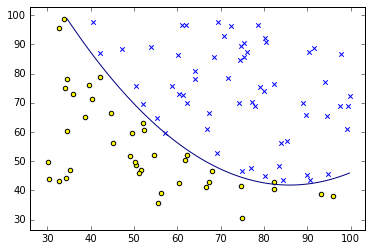

In [602]:
pos = X[np.where(y==1)]
neg = X[np.where(y==0)]
plt.scatter(pos[:,1], pos[:,2], marker='x')
plt.scatter(neg[:,1], neg[:,2], c='yellow', marker='o')
dx = np.linspace(min(X[:,1]), max(X[:,1]), 1000)
dy = np.linspace(min(X[:,2]), max(X[:,2]), 1000)
dx, dy = np.meshgrid(dx,dy)
F = thetaOptReg[0] + thetaOptReg[1]*dx + thetaOptReg[2]*dy + thetaOptReg[3]*(dx**2) 
plt.contour(dx,dy,F,[0])
plt.show()

In [603]:
F.shape

(1000, 1000)

In [604]:
dx.shape

(1000, 1000)